<a href="https://colab.research.google.com/github/Adityapatil1930/Adityapatil1930/blob/main/bank_costomer_churn_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

bank costomer churn model

In [ ]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [6]:
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv')

In [7]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [11]:
df.duplicated('CustomerId').sum()

0

In [13]:
df = df.set_index('CustomerId')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


In [15]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [16]:
df.replace({'Geography':{'France':2,'Germany':1,'Spain':0}},inplace=True)

In [17]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [21]:
df.replace({'Gender':{'Male':0 ,'Female':1}},inplace=True)

In [24]:
df['Num Of Products'].value_counts()

,count
Num Of Products,
1,5084
2,4590
3,266
4,60


In [25]:
df.replace({'NumOfProducts':{1:0,2:1,3:1,4:1}},inplace=True)

In [27]:
df['Has Credit Card'].value_counts()

,count
Has Credit Card,
1,7055
0,2945


In [28]:
df['Is Active Member'].value_counts()

,count
Is Active Member,
1,5151
0,4849


In [30]:
df.loc[(df['Balance']==0), 'Churn'].value_counts()

,count
Churn,
0,3117
1,500


In [31]:
df['Zero Balance'] = np.where(df['Balance']==0,1,0)

<Axes: >

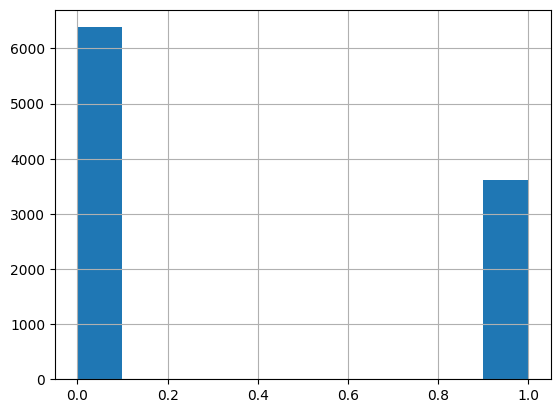

In [32]:
df['Zero Balance'].hist()

In [36]:
df.groupby(['Churn', 'Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             2064         2064    2064  2064    2064     2064   
      1             1695         1695    1695  1695    1695     1695   
      2             4204         4204    4204  4204    4204     4204   
1     0              413          413     413   413     413      413   
      1              814          814     814   814     814      814   
      2              810          810     810   810     810      810   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     2064             2064              2064   
      1                     1695             1695              1695   
      2                     4204             4204              4204   
1     0                      413              413               413   
      1                      814              814               814   
      2                      810              810               810   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      1695          1695  
      2                      4204          4204  
1     0                       413           413  
      1                       814           814  
      2                       810           810

In [37]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [39]:
X = df.drop(['Surname','Churn'],axis=1)

In [40]:
y = df['Churn']

In [44]:
X.shape,y.shape

((10000, 11), (10000,))

In [45]:
df['Churn'].value_counts()

,count
Churn,
0,7963
1,2037


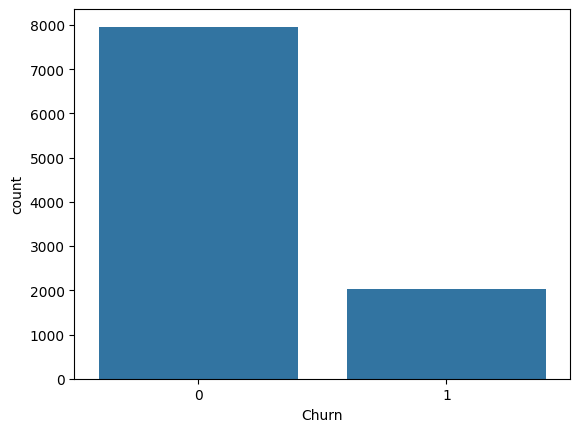

In [47]:
sns.countplot(x = 'Churn' , data = df);

In [48]:
X.shape,y.shape

((10000, 11), (10000,))

In [49]:
from imblearn.under_sampling import RandomUnderSampler

In [50]:
rus = RandomUnderSampler(random_state=2529)

In [51]:
X_rus,y_rus = rus.fit_resample(X,y)

In [52]:
X_rus.shape,y_rus.shape , X.shape,y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

In [53]:
y.value_counts()

,count
Churn,
0,7963
1,2037


In [54]:
y_rus.value_counts()

,count
Churn,
0,2037
1,2037


<Axes: ylabel='Frequency'>

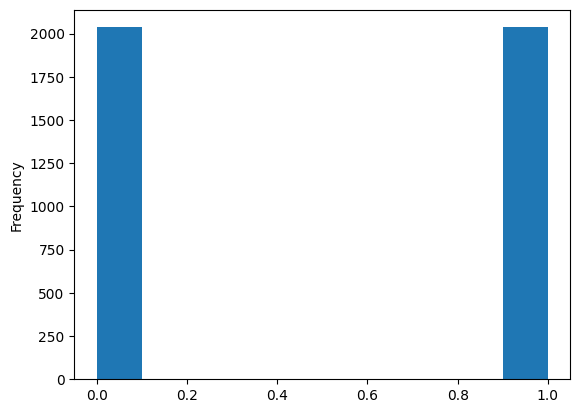

In [55]:
y_rus.plot(kind='hist')

In [56]:
from imblearn.over_sampling import RandomOverSampler

In [57]:
ros = RandomOverSampler(random_state=2529)

In [58]:
X_ros,y_ros = ros.fit_resample(X,y)

In [59]:
X_ros.shape,y_ros.shape , X.shape,y.shape

((15926, 11), (15926,), (10000, 11), (10000,))

In [60]:
y.value_counts()

,count
Churn,
0,7963
1,2037


In [61]:
y_ros.value_counts()

,count
Churn,
1,7963
0,7963


<Axes: ylabel='Frequency'>

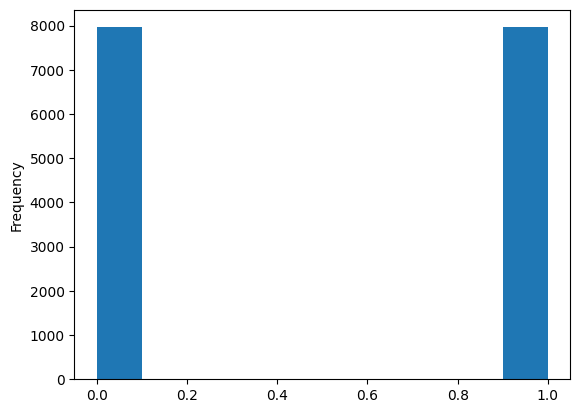

In [62]:
y_ros.plot(kind='hist')

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train,X_test,y_train,y_test = train_test_split(X_rus,y_rus,test_size=0.3,random_state=2529)

In [65]:
X_train_rus,X_test_rus,y_train_rus,y_test_rus = train_test_split(X_ros,y_ros,test_size=0.3,random_state=2529)

In [67]:
X_train_ros,X_test_ros,y_train_ros,y_test_ros = train_test_split(X,y,test_size=0.3,random_state=252)

In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
sc = StandardScaler()

In [73]:
X_train[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_train[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

In [74]:
X_test[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_test[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

In [75]:
X_train_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_train_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

In [76]:
X_test_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_test_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

In [77]:
from sklearn.svm import SVC

In [78]:
svc = SVC()

In [79]:
svc.fit(X_train,y_train)

SVC()

In [80]:
y_pred = svc.predict(X_test)

In [81]:
from sklearn.metrics import confusion_matrix,classification_report

In [82]:
confusion_matrix(y_test,y_pred)

array([[487, 140],
       [180, 416]])

In [83]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.78      0.75       627
           1       0.75      0.70      0.72       596

    accuracy                           0.74      1223
   macro avg       0.74      0.74      0.74      1223
weighted avg       0.74      0.74      0.74      1223



In [84]:
from sklearn.model_selection import GridSearchCV

In [85]:
param_grid = {'C':[0.1,1,10],'gamma':[1,0.1,0.01],'kernel':['rbf'],'class_weight':['balanced']}

In [86]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2 ,cv=2)
grid.fit(X_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.2s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.4s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.4s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.4s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [87]:
print(grid.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=0.1)


In [88]:
grid_predictions = grid.predict(X_test)

In [89]:
confusion_matrix(y_test,grid_predictions)

array([[490, 137],
       [185, 411]])

In [90]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.73      0.78      0.75       627
           1       0.75      0.69      0.72       596

    accuracy                           0.74      1223
   macro avg       0.74      0.74      0.74      1223
weighted avg       0.74      0.74      0.74      1223



In [91]:
scv_rus = SVC()

In [92]:
scv_rus.fit(X_train_rus,y_train_rus)

SVC()

In [93]:
y_pred_rus = scv_rus.predict(X_test_rus)

In [94]:
confusion_matrix(y_test_rus,y_pred_rus)

array([[   0, 2379],
       [   0, 2399]])

In [95]:
print(classification_report(y_test_rus,y_pred_rus))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2379
           1       0.50      1.00      0.67      2399

    accuracy                           0.50      4778
   macro avg       0.25      0.50      0.33      4778
weighted avg       0.25      0.50      0.34      4778



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [96]:
param_grid = {'C':[0.1,1,10],'gamma':[1,0.1,0.01],'kernel':['rbf'],'class_weight':['balanced']}

In [98]:
grid_rus = GridSearchCV(SVC(),param_grid,refit=True,verbose=2 ,cv=2)
grid_rus.fit(X_train_rus,y_train_rus)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   5.5s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   5.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   4.4s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   4.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=  10.7s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   5.3s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.7s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   4.1s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [99]:
print(grid_rus.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [100]:
grid_predictions_rus = grid_rus.predict(X_test_rus)

In [101]:
confusion_matrix(y_test_rus,grid_predictions_rus)

array([[2379,    0],
       [2399,    0]])

In [102]:
print(classification_report(y_test_rus,grid_predictions_rus))

              precision    recall  f1-score   support

           0       0.50      1.00      0.66      2379
           1       0.00      0.00      0.00      2399

    accuracy                           0.50      4778
   macro avg       0.25      0.50      0.33      4778
weighted avg       0.25      0.50      0.33      4778



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [103]:
SVC_ros = SVC()

In [104]:
SVC_ros.fit(X_train_ros,y_train_ros)

SVC()

In [105]:
y_pred_ros = SVC_ros.predict(X_test_ros)

In [106]:
confusion_matrix(y_test_ros,y_pred_ros)

array([[2350,    0],
       [ 650,    0]])

In [107]:
print(classification_report(y_test_ros,y_pred_ros))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      2350
           1       0.00      0.00      0.00       650

    accuracy                           0.78      3000
   macro avg       0.39      0.50      0.44      3000
weighted avg       0.61      0.78      0.69      3000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [108]:
param_grid = {'C':[0.1,1,10],
              'gamma':[1,0.1,0.01],
              'kernel':['rbf'],
              'class_weight':['balanced']}

In [109]:
grid_ros = GridSearchCV(SVC(),param_grid,refit=True,verbose=2 ,cv=2)
grid_ros.fit(X_train_ros,y_train_ros)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.4s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   2.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.4s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.5s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.5s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.6s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.5s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.9s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [110]:
print(grid_ros.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=1)


In [111]:
grid_predictions_ros = grid_ros.predict(X_test_ros)

In [112]:
confusion_matrix(y_test_ros,grid_predictions_ros)

array([[2350,    0],
       [ 650,    0]])

In [114]:
print(classification_report(y_test_ros,grid_predictions_ros))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      2350
           1       0.00      0.00      0.00       650

    accuracy                           0.78      3000
   macro avg       0.39      0.50      0.44      3000
weighted avg       0.61      0.78      0.69      3000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [115]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.78      0.75       627
           1       0.75      0.70      0.72       596

    accuracy                           0.74      1223
   macro avg       0.74      0.74      0.74      1223
weighted avg       0.74      0.74      0.74      1223



In [116]:
print(classification_report(y_test_rus,grid_predictions_rus))

              precision    recall  f1-score   support

           0       0.50      1.00      0.66      2379
           1       0.00      0.00      0.00      2399

    accuracy                           0.50      4778
   macro avg       0.25      0.50      0.33      4778
weighted avg       0.25      0.50      0.33      4778



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [117]:
print(classification_report(y_test_ros,y_pred_ros))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      2350
           1       0.00      0.00      0.00       650

    accuracy                           0.78      3000
   macro avg       0.39      0.50      0.44      3000
weighted avg       0.61      0.78      0.69      3000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [119]:
print(classification_report(y_test_ros,grid_predictions_ros))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      2350
           1       0.00      0.00      0.00       650

    accuracy                           0.78      3000
   macro avg       0.39      0.50      0.44      3000
weighted avg       0.61      0.78      0.69      3000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
